In [1]:
import pandas as pd
import time
# 数据加载
data = pd.read_csv('./Market_Basket_Optimisation.csv',header=None)
from efficient_apriori import apriori
start = time.time()
transactions=data.fillna('').apply(lambda x:set(x)-{''},axis=1).values
transactions_list=transactions.tolist()
print("当前数据格式为: %s\n" % type(transactions))
itemsets, rules = apriori(transactions_list, min_support=0.03,  min_confidence=0.3)
print('频繁项集：\n', itemsets)
print('关联规则：\n', rules)
end = time.time()
print("用时：\n", end-start)
print('')

# 词云展示
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize


# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    #f = remove_stop_words(f)
    cut_text = word_tokenize(f)
    #print(cut_text)
    cut_text = " ".join(cut_text)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
    )
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
#数据加载
wordLis=""
for i in range(0,7501):
    j=0
    while (j<20 and pd.isnull(data.iloc[i][j])==False):
        wordLis=wordLis+" "+ "%s" % data.iloc[i][j]
        j=j+1
        
create_word_cloud(wordLis)



当前数据格式为: <class 'numpy.ndarray'>

频繁项集：
 {1: {('avocado',): 250, ('brownies',): 253, ('burgers',): 654, ('butter',): 226, ('cake',): 608, ('champagne',): 351, ('chicken',): 450, ('chocolate',): 1229, ('cookies',): 603, ('cooking oil',): 383, ('cottage cheese',): 239, ('eggs',): 1348, ('escalope',): 595, ('french fries',): 1282, ('fresh bread',): 323, ('frozen smoothie',): 475, ('frozen vegetables',): 715, ('grated cheese',): 393, ('green tea',): 991, ('ground beef',): 737, ('herb & pepper',): 371, ('honey',): 356, ('hot dogs',): 243, ('low fat yogurt',): 574, ('milk',): 972, ('mineral water',): 1788, ('olive oil',): 494, ('pancakes',): 713, ('salmon',): 319, ('shrimp',): 536, ('soup',): 379, ('spaghetti',): 1306, ('tomato juice',): 228, ('tomatoes',): 513, ('turkey',): 469, ('whole wheat rice',): 439}, 2: {('chocolate', 'eggs'): 249, ('chocolate', 'french fries'): 258, ('chocolate', 'milk'): 241, ('chocolate', 'mineral water'): 395, ('chocolate', 'spaghetti'): 294, ('eggs', 'french fri

<Figure size 640x480 with 1 Axes>

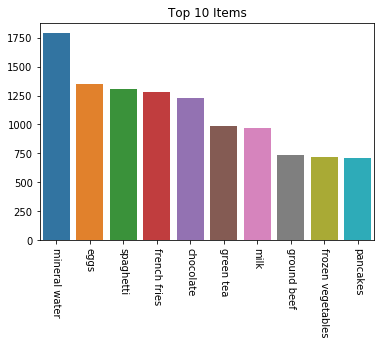

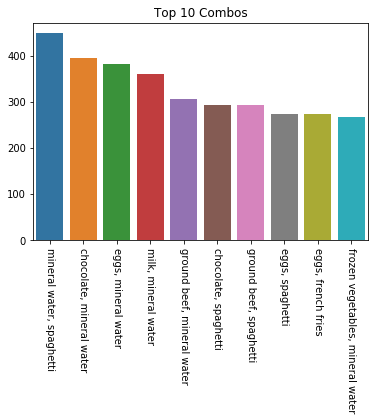

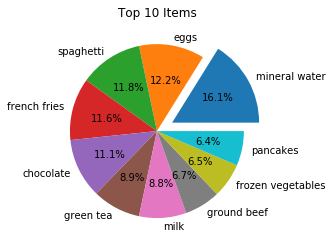

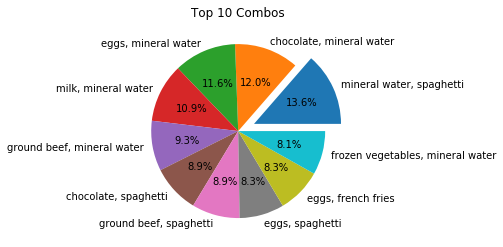

In [50]:
# 可视化 Top 10 items 
# 准备数据
import re
#punctuation = ')(!,;:?"\''
def removePunctuation(text,punctuation):
    text = re.sub(r'[{}]+'.format(punctuation),'',text)
    return text.strip().lower()

L = sorted(itemsets[1].items(),key=lambda item:item[1],reverse=True) 
L = L[:10]
M = sorted(itemsets[2].items(),key=lambda item:item[1],reverse=True) 
M = M[:10]
popItem=[]
popFrequency=[]
popComb=[]
combFreq=[]

punctuation_1 = ')(,\''
punctuation_2 = ')(\''

for i in range(0,10):
    popItem.append(removePunctuation(str(L[i][0]),punctuation_1))
    popFrequency.append(L[i][1])
    popComb.append(removePunctuation(str(M[i][0]),punctuation_2))
    combFreq.append(M[i][1])

import seaborn as sns
import os
from matplotlib.font_manager import FontProperties
import pylab as pl
# bar chart
sns.barplot(popItem, popFrequency)
pl.xticks(rotation=270)
plt.title("Top 10 Items")
plt.show()

sns.barplot(popComb, combFreq)
pl.xticks(rotation=270)
plt.title("Top 10 Combos")
plt.show()

# pie chart 
explode=[0.2,0,0,0,0,0,0,0,0,0]
plt.pie(x = popFrequency, labels=popItem, autopct='%1.1f%%',explode=explode)
plt.title("Top 10 Items")
plt.show()

plt.pie(x = combFreq, labels=popComb, autopct='%1.1f%%',explode=explode)
plt.title("Top 10 Combos")
plt.show()